In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("datos/restaurantes.csv")
df

,Nombre,Comida,Variedad,Servicio,Ambiente,Precio
0,Restaurante 1,4,4,5,4,3
1,Restaurante 2,5,5,4,5,2
2,Restaurante 3,3,4,5,3,5


In [4]:
import plotly.graph_objects as go

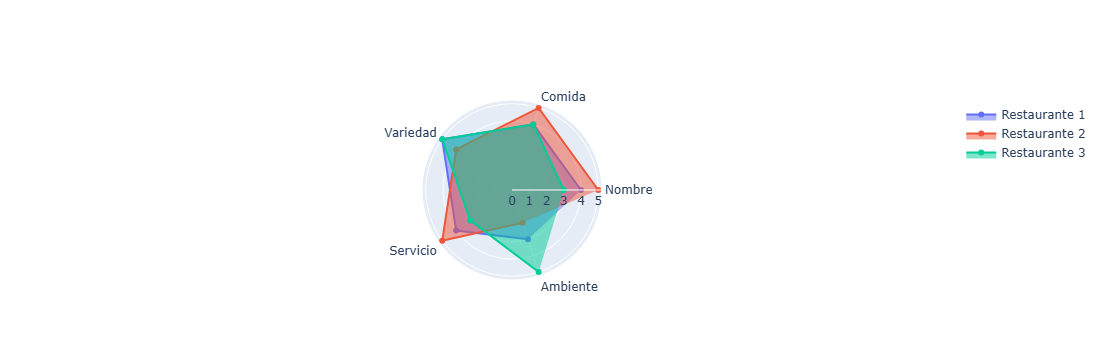

In [15]:
categorias = df.columns.values
fig = go.Figure()

fig.add_trace(
    go.Scatterpolar(
        r=df.iloc[0, 1:],
        theta=categorias,
        fill="toself",
        name="Restaurante 1"
    )
)

fig.add_trace(
    go.Scatterpolar(
        r=df.iloc[1, 1:],
        theta=categorias,
        fill="toself",
        name="Restaurante 2"
    )
)

fig.add_trace(
    go.Scatterpolar(
        r=df.iloc[2, 1:],
        theta=categorias,
        fill="toself",
        name="Restaurante 3"
    )
)

fig.show()

In [16]:
df = pd.read_csv("datos/pinguinos.csv")
df = df.dropna()
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [20]:
agrupado = df.groupby("species").mean(numeric_only=True)
agrupado

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.823973,18.347260,190.102740,3706.164384
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.542500,15.002500,217.233333,5090.625000


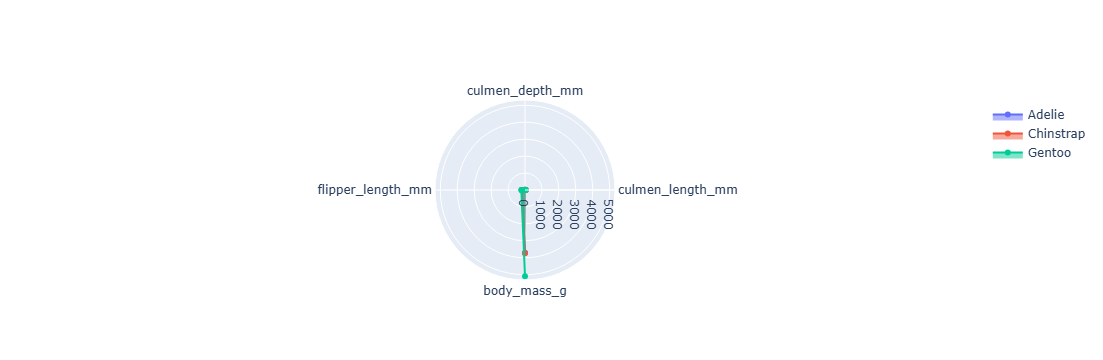

In [22]:
categorias = agrupado.columns
fig = go.Figure()

fig.add_trace(
    go.Scatterpolar(
        r=agrupado.iloc[0, ],
        theta=categorias,
        fill="toself",
        name="Adelie"
    )
)

fig.add_trace(
    go.Scatterpolar(
        r=agrupado.iloc[1, ],
        theta=categorias,
        fill="toself",
        name="Chinstrap"
    )
)

fig.add_trace(
    go.Scatterpolar(
        r=agrupado.iloc[2, ],
        theta=categorias,
        fill="toself",
        name="Gentoo"
    )
)

fig.show()

In [23]:
# hay que normalizr 
df2 = df[categorias]
df2

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [24]:
df_norm = (df2-df2.min())/(df2.max() - df2.min())
df_norm["species"] = df["species"]
df_norm

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species
0,0.254545,0.666667,0.152542,0.291667,Adelie
1,0.269091,0.511905,0.237288,0.305556,Adelie
2,0.298182,0.583333,0.389831,0.152778,Adelie
4,0.167273,0.738095,0.355932,0.208333,Adelie
5,0.261818,0.892857,0.305085,0.263889,Adelie
...,...,...,...,...,...
338,0.549091,0.071429,0.711864,0.618056,Gentoo
340,0.534545,0.142857,0.728814,0.597222,Gentoo
341,0.665455,0.309524,0.847458,0.847222,Gentoo
342,0.476364,0.202381,0.677966,0.694444,Gentoo


In [25]:
agrupado = df_norm.groupby("species").mean(numeric_only=True)
agrupado

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,0.244508,0.624674,0.306826,0.279490
Chinstrap,0.608503,0.633403,0.403789,0.286969
Gentoo,0.561545,0.226488,0.766667,0.664062


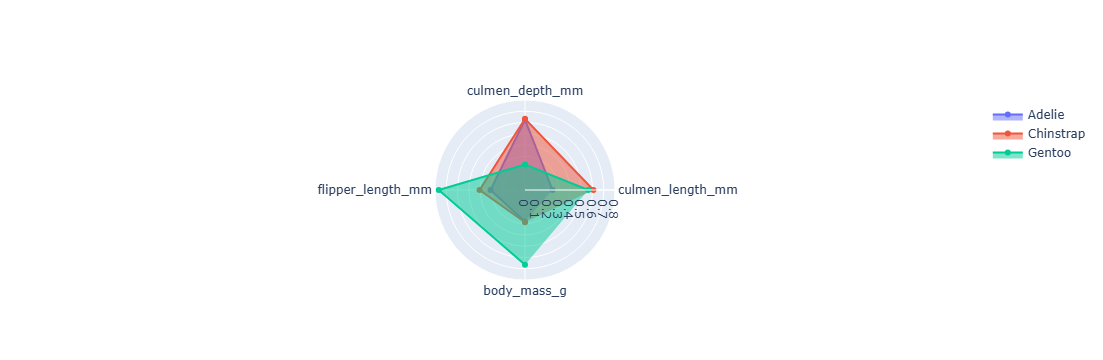

In [27]:
categorias = agrupado.columns
fig = go.Figure()

fig.add_trace(
    go.Scatterpolar(
        r=agrupado.iloc[0, ],
        theta=categorias,
        fill="toself",
        name="Adelie"
    )
)

fig.add_trace(
    go.Scatterpolar(
        r=agrupado.iloc[1, ],
        theta=categorias,
        fill="toself",
        name="Chinstrap"
    )
)

fig.add_trace(
    go.Scatterpolar(
        r=agrupado.iloc[2, ],
        theta=categorias,
        fill="toself",
        name="Gentoo"
    )
)

fig.show()